In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def getData(path, platform, cols):
    data = pd.read_csv(path, parse_dates=['created_at'])
    for col in data.columns:
        if cols[col]:
            data = data.drop(col, 1)
    data['platform'] = platform
    data = data.sort_values(by='created_at')
    return data

reddit_data = getData('Data\\reddit_labeled.csv', 'reddit', {
    'Unnamed: 0': True,
    'Unnamed: 0.1': True,
    'author': True,
    'body': False,
    'created_utc': True,
    'created': True,
    'created_at': False,
    'sentiment': False
})

twitter_data = getData('Data\\twitter_labeled2.csv', 'twitter', {
    'Unnamed: 0.1': True,
    'Unnamed: 0': True,
    'id': True,
    'conversation_id': True,
    'created_at': False,
    'date': True,
    'time': True,
    'timezone': True,
    'user_id': True,
    'username': True,
    'name': True,
    'place': True,
    'tweet': False,
    'language': True,
    'mentions': True,
    'urls': True,
    'photos': True,
    'replies_count': True,
    'retweets_count': False,
    'likes_count': False,
    'hashtags': True,
    'cashtags': True,
    'link': True,
    'retweet': True,
    'quote_url': True,
    'video': True,
    'thumbnail': True,
    'near': True,
    'geo': True,
    'source': True,
    'user_rt_id': True,
    'user_rt': True,
    'retweet_id': True,
    'reply_to': True,
    'retweet_date': True,
    'translate': True,
    'trans_src': True,
    'trans_dest': True,
    'sentiment': False
})

twitter_data = twitter_data.rename(columns={'tweet': 'body'})

In [3]:
data = pd.concat([twitter_data, reddit_data], ignore_index=True, sort=['created_at'])

In [4]:
import math 

data['likes_count'] = data['likes_count'].apply(lambda x: int(0) if math.isnan(x) else x)
data['retweets_count'] = data['retweets_count'].apply(lambda x: int(0) if math.isnan(x) else x)
data['sentiment_weighted'] = data.apply(lambda x: x['likes_count']+x['retweets_count'] if x['sentiment'] == 1 else -x['likes_count']-x['retweets_count'], axis=1 )
data.head()

body          created_at  \
0  episode 13 crypto thunderdome part 1 prize 50 ... 2020-12-20 02:22:33   
1  grt chart going off the screen lambo soon btc ... 2020-12-20 04:29:45   
2  live bitcoin trading with deribot on deribit e... 2020-12-20 06:12:32   
3  deribot daily trading report 20122020 1107 utc... 2020-12-20 06:16:32   
4  datx see you at 1 datx buy back have started d... 2020-12-20 09:10:00   

   likes_count platform  retweets_count  sentiment  sentiment_weighted  
0         37.0  twitter            41.0          1                78.0  
1          2.0  twitter             1.0          1                 3.0  
2          9.0  twitter            14.0          0               -23.0  
3         53.0  twitter            47.0          1               100.0  
4          7.0  twitter             1.0          0                -8.0

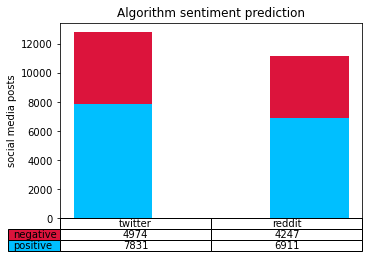

In [5]:
positive_tweets = data[(data.platform == 'twitter') & (data.sentiment == 1)].count()['sentiment']
negative_tweets = data[(data.platform == 'twitter') & (data.sentiment == 0)].count()['sentiment']

positive_posts = data[(data.platform == 'reddit') & (data.sentiment == 1)].count()['sentiment']
negative_posts = data[(data.platform == 'reddit') & (data.sentiment == 0)].count()['sentiment']

columns = ('twitter', 'reddit')
rows = ['negative', 'positive']
colors = ['deepskyblue', 'crimson']

counts = [[positive_tweets, positive_posts], [negative_tweets, negative_posts]]
values = np.arange(0, 30000, 500)
n_rows = len(counts)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, counts[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = counts[row]
    cell_text.append([x for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      cellLoc='center',
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel('social media posts')
plt.xticks([])
plt.title('Algorithm sentiment prediction')

plt.show()


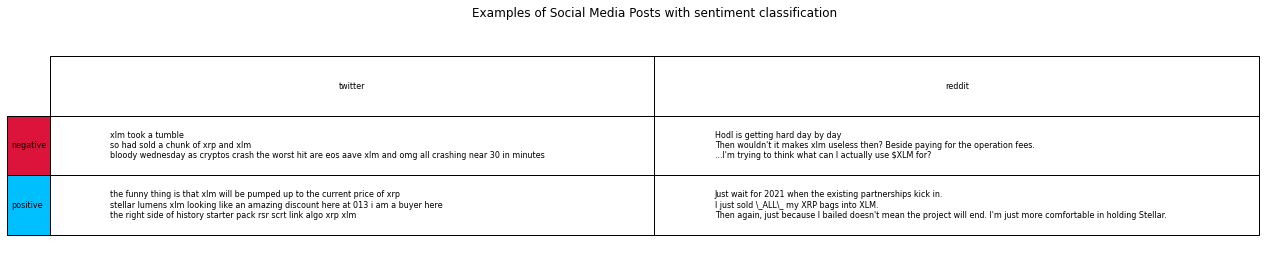

In [6]:
#handpicked
positive_tweets = 'the funny thing is that xlm will be pumped up to the current price of xrp\nstellar lumens xlm looking like an amazing discount here at 013 i am a buyer here\nthe right side of history starter pack rsr scrt link algo xrp xlm'
negative_tweets = 'xlm took a tumble\nso had sold a chunk of xrp and xlm\nbloody wednesday as cryptos crash the worst hit are eos aave xlm and omg all crashing near 30 in minutes'

positive_posts = 'Just wait for 2021 when the existing partnerships kick in.\nI just sold \_ALL\_ my XRP bags into XLM.\nThen again, just because I bailed doesn\'t mean the project will end. I\'m just more comfortable in holding Stellar.'

negative_posts = 'Hodl is getting hard day by day\nThen wouldn\'t it makes xlm useless then? Beside paying for the operation fees.\n...I\'m trying to think what can I actually use $XLM for?'

plt.figure(figsize=(24, 5))
plt.title('Examples of Social Media Posts with sentiment classification')

table = plt.table(cellText=[[negative_tweets, negative_posts], [positive_tweets, positive_posts]],
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='center', cellLoc='left')
table.scale(1, 5.5)

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.xticks([])
plt.yticks([])
plt.box(on=None)
plt.show()

In [7]:
price_data = pd.read_csv('Data\\xlm_price_data.csv', parse_dates=['open_time', 'close_time'])

In [8]:
#remove reddit data

data = data[data['platform'] == 'twitter']
data = data.sort_values(by='created_at')

average_prices = []
sentiments = []
volumes = []
for dp in data.iterrows():
    price = price_data[(price_data.open_time < dp[1].created_at) & (price_data.close_time > dp[1].created_at)]

    if(price.high_price.size > 0 and price.low_price.size > 0):
        open_p = price.high_price.iloc[0]
        close_p = price.low_price.iloc[0]
        average_prices.append(np.average([open_p, close_p]))
        sentiments.append(dp[1].sentiment_weighted)
        volumes.append(price.volume.iloc[0])

average_prices = np.array(average_prices)
sentiments = np.array(sentiments)
volumes = np.array(volumes)

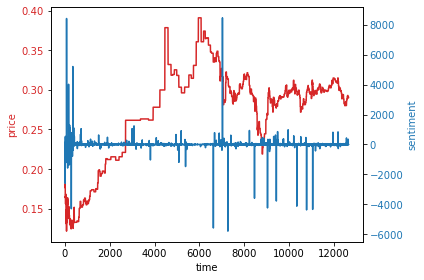

In [16]:
def plot_price_volume_sentiment(average_prices, volumes, sentiments):
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel('time')
    ax1.set_ylabel('price', color=color)
    lines = ax1.plot(average_prices, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('sentiment', color=color)  # we already handled the x-label with ax1
    ax2.plot(sentiments, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    return lines
lines = plot_price_volume_sentiment(average_prices, volumes, sentiments);

xy = lines[0].get_data()

12577
12650


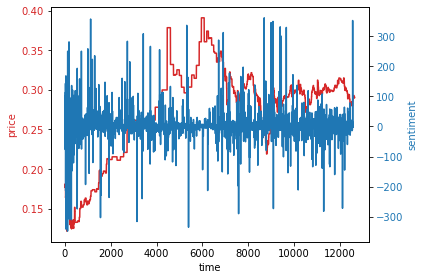

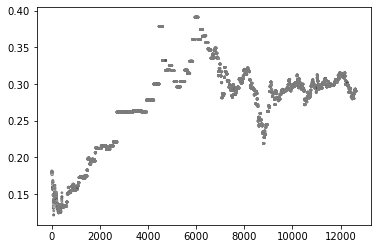

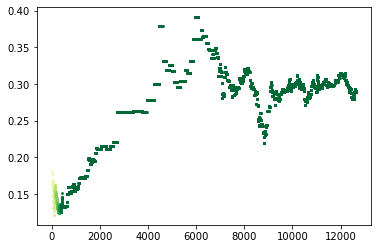

In [179]:
from scipy.stats import zscore

s2 = sentiments[(abs(sentiments - np.mean(sentiments))) < (2 * np.std(sentiments))]
# outliers_indices = [i for i,n in enumerate(sentiments) if i not in indices]
print(len(s2))
print(len(sentiments))
# s2 = np.delete(sentiments, outliers_indices)
# x2 = np.delete(xy[0], outliers_indices)
# y2 = np.delete(xy[1], outliers_indices)

x2 = xy[0][(abs(sentiments - np.mean(sentiments))) < (2 * np.std(sentiments))]

y2 = xy[1][(abs(sentiments - np.mean(sentiments))) < (2 * np.std(sentiments))]

plot_price_volume_sentiment(average_prices, volumes, s2);

fig, ax = plt.subplots()
plt.scatter(x2, y2, c=s2, s=3);
plt.gray()
plt.show()

import matplotlib.pyplot as plt
import matplotlib as mpl
norm = mpl.colors.Normalize(vmin=min(s2), vmax=max(s2))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap='RdYlGn')
for i, xi in enumerate(x2):
    plt.scatter(x2[i],y2[i],color=cmap.to_rgba(i+1),s=3)
plt.show()


In [41]:
A = pd.DataFrame(average_prices, columns=['average_price'])
B = pd.DataFrame(sentiments, columns=['sentiment_weighted'])
C = pd.DataFrame(volumes, columns=['volume'])

union = pd.concat([A, B, C], axis=1, join="inner")

union.corr()

average_price  sentiment_weighted    volume
average_price            1.000000           -0.021338  0.239148
sentiment_weighted      -0.021338            1.000000  0.007456
volume                   0.239148            0.007456  1.000000